# CS 109A/STAT 121A/AC 209A/CSCI E-109A: 
# Spotify Final Project: Group 31

**Harvard University**<br/>
**Fall 2017**<br/>
**Group Members**: Michelle Chiang, David Seong, Emily Chen<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from IPython.display import Image
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
import datetime as DT
import seaborn as sns
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.utils import resample
from scipy import stats
import operator
%matplotlib inline

/Users/emilychen1/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Spotify Predictors Only
## Shotgun Phase

## Shotgun Phase

In [2]:
# read csv of spotify predictors
df = pd.read_csv('spotify_predictors.csv')
df = df.dropna()
df = df.drop(['Unnamed: 0'], 1)

In [3]:
# split data
np.random.seed(9001)
msk = np.random.rand(len(df)) < 0.75
data_train = df[msk]
data_test = df[~msk]

pd.set_option('display.max_columns', 100)
data_train.head()

,followers,majority_artist_genres,name,owner,track_ids,num_tracks,avg_song_popularity,avg_loudness,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_num_artists,avg_num_markets,majority_explicit,majority_mode,majority_album_type,avg_album_popularity,avg_album_release_year,avg_artist_popularity,avg_artist_followers
0,18129916,pop,Today's Top Hits,spotify,"['0tBbt8CrmxbjRP0pueQkyU', ' 2amzBJRBPOGszBem4...",50,84.277778,-5.696467,0.085307,0.170962,2.145467e-05,0.154687,0.326580,1.833333,38.500000,0.0,0.0,single,81.444444,2017.000000,91.160000,2.545533e+06
3,3787551,indie r&b,Are & Be,spotify,"['6gU9OKjOE7ghfEd55oRO57', ' 25wStx3LyTjYmHTd3...",51,62.090909,-8.381700,0.118980,0.299180,7.865653e-02,0.111130,0.306480,1.090909,34.818182,0.0,1.0,single,59.727273,2016.818182,75.200000,1.603455e+06
5,4254642,contemporary country,Hot Country,spotify,"['54EWDYWhs4w6SODnxabuoh', ' 7rdK9NSJIRBZAiXC0...",51,77.200000,-6.154000,0.054200,0.199580,4.080000e-07,0.175000,0.536000,1.400000,50.200000,0.0,1.0,single,73.400000,2016.400000,78.857143,9.805109e+05
6,6639722,latin,¡Viva Latino!,spotify,"['2hl6q70unbviGo3g1R7uFx', ' 2SmgFAhQkQCQPyBiB...",50,83.222222,-4.502375,0.084313,0.151738,1.028625e-05,0.120575,0.614750,2.222222,48.333333,0.0,1.0,single,80.333333,2017.000000,94.142857,2.632650e+06
9,3323766,focus,Peaceful Piano,spotify,"['1JoAjYaI3zvhXVx41HH7Fc', ' 7ih16mauHrpUMOIeW...",100,58.000000,-22.783143,0.035443,0.991286,9.177143e-01,0.098943,0.204157,1.071429,41.500000,0.0,0.0,album,51.333333,2015.777778,61.428571,5.862007e+04


### EDA

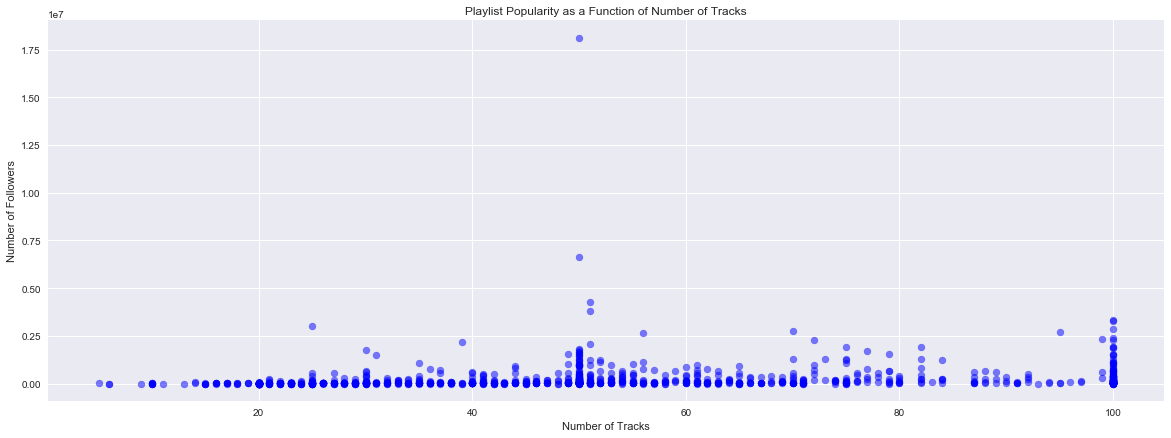

In [4]:
plt.figure(figsize=(20,7))
plt.scatter(data_train['num_tracks'], data_train['followers'], color='b', alpha=0.5)
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Number of Tracks')

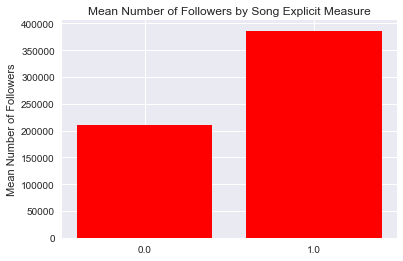

In [5]:
by_explicit = data_train.groupby('majority_explicit')
explicit_means = by_explicit['followers'].mean()
plt.bar(range(len(explicit_means)),explicit_means,tick_label=list(explicit_means.index), color='r')
plt.ylabel('Mean Number of Followers')
plt.title('Mean Number of Followers by Song Explicit Measure')
plt.show()

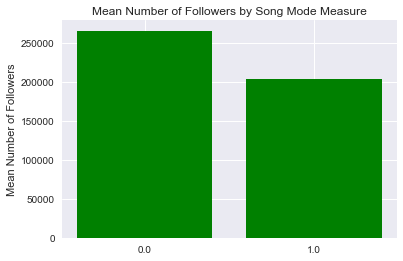

In [6]:
by_mode = data_train.groupby('majority_mode')
mode_means = by_mode['followers'].mean()
plt.bar(range(len(mode_means)),mode_means,tick_label=list(mode_means.index), color='g')
plt.ylabel('Mean Number of Followers')
plt.title('Mean Number of Followers by Song Mode Measure')
plt.show()

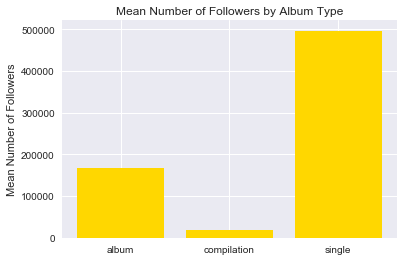

In [7]:
by_album_type = data_train.groupby('majority_album_type')
album_type_means = by_album_type['followers'].mean()
plt.bar(range(len(album_type_means)),album_type_means,tick_label=list(album_type_means.index), color='gold')
plt.ylabel('Mean Number of Followers')
plt.title('Mean Number of Followers by Album Type')
plt.show()

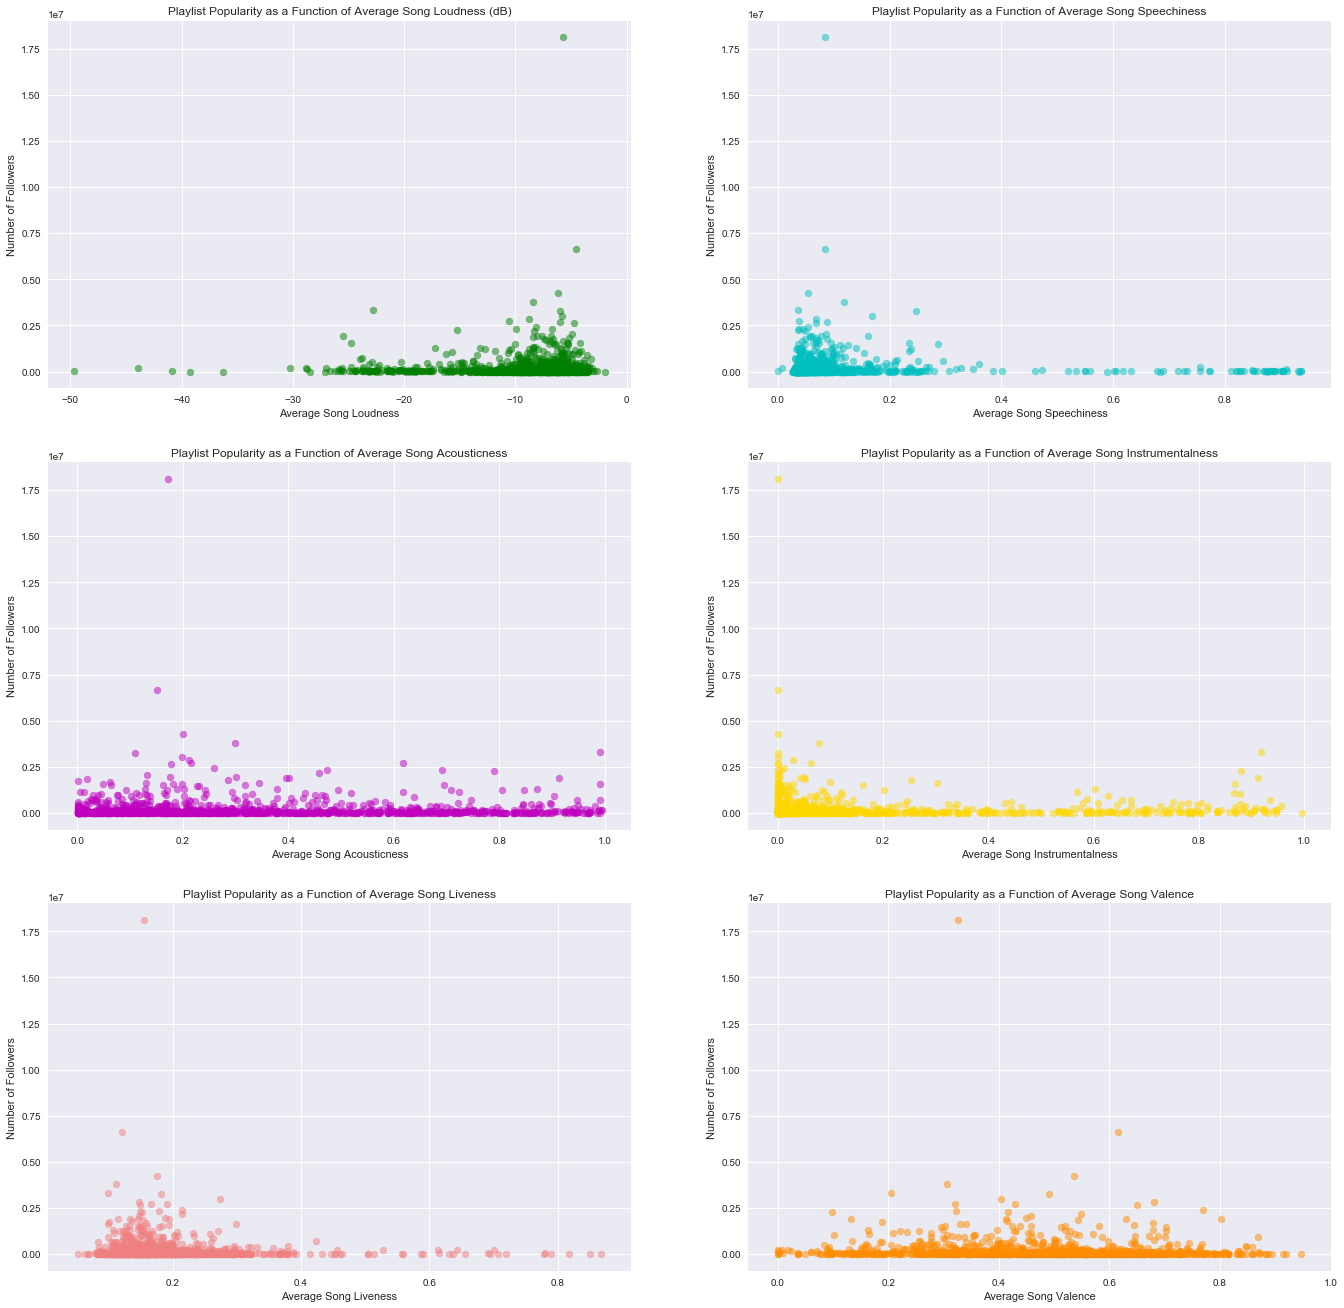

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(23, 23))

plt.subplot(3, 2, 1)
plt.scatter(data_train['avg_loudness'], data_train['followers'], color='g', alpha=0.5)
plt.xlabel('Average Song Loudness')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Loudness (dB)')

plt.subplot(3, 2, 2)
plt.scatter(data_train['avg_speechiness'], data_train['followers'], color='c', alpha=0.5)
plt.xlabel('Average Song Speechiness')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Speechiness')

plt.subplot(3, 2, 3)
plt.scatter(data_train['avg_acousticness'], data_train['followers'], color='m', alpha=0.5)
plt.xlabel('Average Song Acousticness')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Acousticness')

plt.subplot(3, 2, 4)
plt.scatter(data_train['avg_instrumentalness'], data_train['followers'], color='gold', alpha=0.5)
plt.xlabel('Average Song Instrumentalness')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Instrumentalness')

plt.subplot(3, 2, 5)
plt.scatter(data_train['avg_liveness'], data_train['followers'], color='lightcoral', alpha=0.5)
plt.xlabel('Average Song Liveness')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Liveness')

plt.subplot(3, 2, 6)
plt.scatter(data_train['avg_valence'], data_train['followers'], color='darkorange', alpha=0.5)
plt.xlabel('Average Song Valence')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Valence')

plt.show()

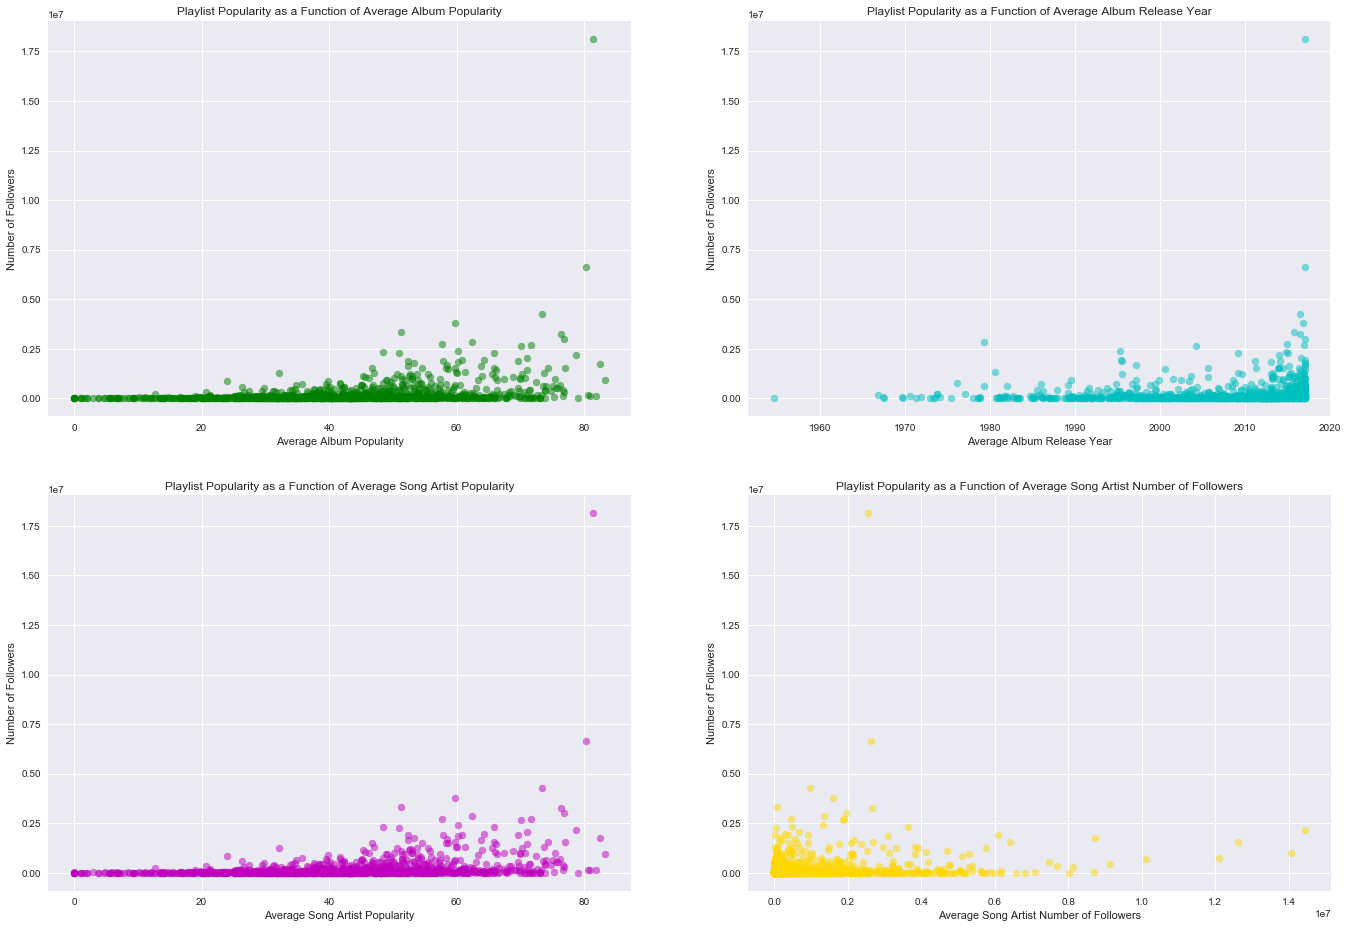

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(23, 16))

plt.subplot(2, 2, 1)
plt.scatter(data_train['avg_album_popularity'], data_train['followers'], color='g', alpha=0.5)
plt.xlabel('Average Album Popularity')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Album Popularity')

plt.subplot(2, 2, 2)
plt.scatter(data_train['avg_album_release_year'], data_train['followers'], color='c', alpha=0.5)
plt.xlabel('Average Album Release Year')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Album Release Year')

plt.subplot(2, 2, 3)
plt.scatter(data_train['avg_album_popularity'], data_train['followers'], color='m', alpha=0.5)
plt.xlabel('Average Song Artist Popularity')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Artist Popularity')

plt.subplot(2, 2, 4)
plt.scatter(data_train['avg_artist_followers'], data_train['followers'], color='gold', alpha=0.5)
plt.xlabel('Average Song Artist Number of Followers')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Artist Number of Followers')

plt.show()

In [10]:
# one-hot encoding for categorical predictors
data_train = pd.get_dummies(data_train, columns=['majority_album_type'], drop_first=False)
data_test = pd.get_dummies(data_test, columns=['majority_album_type'], drop_first=False)

# get column names
column_headers = list(data_train.columns.values)

# get variables
X_train = data_train.iloc[:,5:]
y_train = data_train.iloc[:,0]

X_test = data_test.iloc[:,5:]
y_test = data_test.iloc[:,0]

### Linear Regression

In [11]:
X_train2 = sm.add_constant(X_train.values)
model = sm.OLS(y_train.values, X_train2)
results = model.fit()

y_hat_train = results.predict(X_train2)

# test case
X_test2 = sm.add_constant(X_test.values)
y_hat_test = results.predict(X_test2)

r2_score_train = r2_score(y_train, y_hat_train) 
r2_score_test = r2_score(y_test, y_hat_test)

print('R^2 Values for Train, Test Using Linear Regression:', r2_score_train, r2_score_test)

R^2 Values for Train, Test Using Linear Regression: 0.168225035255 0.181277116647


### Polynomial Terms Regression

In [12]:
r2_train_poly = []
r2_test_poly = []

# make dataframes to add polynomial terms to
cont = ['avg_album_popularity', 'avg_album_release_year', 'avg_artist_popularity', 'avg_artist_followers', 'num_tracks', 'avg_song_popularity', 'avg_loudness', 'avg_speechiness', 'avg_acousticness', 'avg_instrumentalness', 'avg_liveness', 'avg_valence', 'avg_num_artists', 'avg_num_markets']
X_binary_only = X_train.drop(['avg_album_popularity', 'avg_album_release_year', 'avg_artist_popularity', 'avg_artist_followers', 'num_tracks', 'avg_song_popularity', 'avg_loudness', 'avg_speechiness', 'avg_acousticness', 'avg_instrumentalness', 'avg_liveness', 'avg_valence', 'avg_num_artists', 'avg_num_markets'], axis=1)
X_test_bin_only = X_test.drop(['avg_album_popularity', 'avg_album_release_year', 'avg_artist_popularity', 'avg_artist_followers', 'num_tracks', 'avg_song_popularity', 'avg_loudness', 'avg_speechiness', 'avg_acousticness', 'avg_instrumentalness', 'avg_liveness', 'avg_valence', 'avg_num_artists', 'avg_num_markets'], axis=1)
X_poly = X_binary_only.copy()
X_test_poly = X_test_bin_only.copy()

X_poly_test_all = X_test.copy()
X_poly_train_all = X_train.copy()

# function to create and add polynomial terms to dataframe
def add_poly_features(train, test, poly_train, poly_test, polylist):
    for col in polylist:
        for i in range(2,4):
            poly_train[col + '_' + str(i)] = train[col]**i
            poly_test[col + '_' + str(i)] = test[col]**i

add_poly_features(X_train, X_test, X_poly_train_all, X_poly_test_all,cont)

# polynomial term regression 
poly_regression_model = linear_model.LinearRegression(fit_intercept=False)
poly_regression_model.fit(X_poly_train_all, y_train)

y_hat_train = poly_regression_model.predict(X_poly_train_all)
y_hat_test = poly_regression_model.predict(X_poly_test_all)


r2_train_poly.append( r2_score(y_train, y_hat_train))
r2_test_poly.append( r2_score(y_test, y_hat_test))

print('R^2 Values for Train, Test Using Polynomial Regression:', r2_train_poly, r2_test_poly)

R^2 Values for Train, Test Using Polynomial Regression: [0.21866516189664709] [0.18486578914356244]


### kNN Regression

In [13]:
# try multiple k's
K = [1, 2, 4,8, 10, 50, 100, 250, 500, 600, 700, 800, 900, 1000]
r2_test_knn = []
r2_train_knn = []

# try each different k and calculate R^2
for i,k in enumerate(K): 
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    predicted_pickups_train = knn_model.predict(X_train)
    predicted_pickups = knn_model.predict(X_test)

    r2_train_knn.append( r2_score(y_train, predicted_pickups_train))
    r2_test_knn.append( r2_score(y_test, predicted_pickups))
    
print('R^2 Values for Train Using kNN Regression:', r2_train_knn)
print()
print('R^2 Values for Test Using kNN Regression:', r2_test_knn)

R^2 Values for Train Using kNN Regression: [0.99999999826605368, 0.67361557405130701, 0.26014861730618322, 0.14666628473394638, 0.12441822659635149, 0.042620591885406456, 0.029105850221909146, 0.022963572284714795, 0.013139851669411118, 0.011592111214729361, 0.0092869321588529008, 0.0077948862622220227, 0.0073745784743184384, 0.0056233810101773418]

R^2 Values for Test Using kNN Regression: [-0.75715473073802242, -0.25301680053630093, -0.30348630520483377, -0.094250067982748709, -0.12328060001080909, -0.021899414008623497, -0.013522963401996657, 0.0045474078918134042, 0.0031360746980091392, 0.0017065831673064302, 0.0013485495695024774, 0.0014863803700982947, 0.00016419258602440312, -0.00075057625934760175]


### Random Forest Regression

In [14]:
r2_train_rf = []
r2_test_rf = []

# check multiple depths to see which depth is best
for i in range(1, 20):
    rf_reg = RandomForestRegressor(max_depth=i)
    rf_reg.fit(X_train, y_train)

    rf_yhat_train = rf_reg.predict(X_train)
    rf_yhat_test = rf_reg.predict(X_test)

    r2_train_rf.append( r2_score(y_train, rf_yhat_train))
    r2_test_rf.append( r2_score(y_test, rf_yhat_test))

print('R^2 Values for Train Using Random Forest Regression:', r2_train_rf)
print()
print('R^2 Values for Test Using Random Forest Regression:', r2_test_rf)

R^2 Values for Train Using Random Forest Regression: [0.49720296756434346, 0.61270131485010926, 0.68781757760996243, 0.66572656890709236, 0.72579428734652485, 0.76220222715670116, 0.83028968917612855, 0.89600687647170285, 0.82751658981528342, 0.90397467822481714, 0.82688300968743556, 0.80932068679634084, 0.80088932016355352, 0.8318520139901675, 0.84760169764201365, 0.87436773242829824, 0.9327280066845034, 0.86419104646927214, 0.93431964941287748]

R^2 Values for Test Using Random Forest Regression: [0.065688530132135381, 0.11686894621887656, 0.24313162668286292, 0.28709485521131284, 0.2662607744323261, 0.34904452912818174, 0.29851039695836878, 0.3065957790310373, 0.36954388468561639, 0.2522709301908852, 0.23787368602781456, 0.26886389619395945, 0.24574812074392371, 0.33606857579939109, 0.25281436758556375, 0.27813440591777383, 0.33600838787033338, 0.26840161712604982, 0.27994817289037111]


In [15]:
# get best depth
index, value = max(enumerate(r2_test_rf), key=operator.itemgetter(1))
best_depth = index + 1

print('Best Depth for Random Forest Tree Depth:', best_depth )

Best Depth for Random Forest Tree Depth: 9


## Fine Tuning Phase

### Ridge and Lasso for Polynomial Term Regression

In [16]:
# Ridge Regression on Polynomial Term Regression
lambdas = [.001,.005,1,5,10,50,100,500,1000]    
ridge = RidgeCV(alphas=lambdas, fit_intercept=False, normalize=True, cv=10)
ridge.fit(X_poly_train_all, y_train)

print("Ridge train R^2: ", ridge.score(X_poly_train_all, y_train))
print('Ridge test R^2', ridge.score(X_poly_test_all, y_test))

Ridge train R^2:  0.311660608922
Ridge test R^2 0.26309415895


In [17]:
# Lasso Regression on Polynomial Term Regression
lasso = LassoCV(alphas=lambdas, fit_intercept=False, normalize=True, cv=10)
lasso.fit(X_poly_train_all, y_train)

print("Lasso train R^2: ", lasso.score(X_poly_train_all, y_train))
print('Lasso test R^2', lasso.score(X_poly_test_all, y_test))

/Users/emilychen1/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso train R^2:  0.309383380859
Lasso test R^2 0.26803387052


/Users/emilychen1/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [18]:
# Fine Tuning Random Forest: Initial Run with max_depth set to the optimal depth from shotgun approach
r2_train_rf = []
r2_test_rf = []

rf_reg = RandomForestRegressor(max_depth=best_depth)
rf_reg.fit(X_train, y_train)

rf_yhat_train = rf_reg.predict(X_train)
rf_yhat_test = rf_reg.predict(X_test)

r2_train_rf.append( r2_score(y_train, rf_yhat_train))
r2_test_rf.append( r2_score(y_test, rf_yhat_test))

print('R^2 Values for Train, Test Using Random Forest Regression:', r2_train_rf, r2_test_rf)

R^2 Values for Train, Test Using Random Forest Regression: [0.8958707740469255] [0.29070087056355209]


In [19]:
# step 1: fine tune the number of trees
r2_train_rf_trees = []
r2_test_rf_trees = []

# create list of tree numbers we will test
trees = [2**x for x in range(8)]  # 2, 4, 8, 16, 32, ... 

# test the tree numbers keeping max_depth at 9
for n_trees in trees:
    rf = RandomForestRegressor(n_estimators=n_trees, max_depth=best_depth, max_features='auto')
    rf.fit(X_train, y_train)

    rf_yhat_train = rf.predict(X_train)
    rf_yhat_test = rf.predict(X_test)

    r2_train_rf_trees.append(r2_score(y_train, rf_yhat_train))
    r2_test_rf_trees.append(r2_score(y_test, rf_yhat_test))
    
print('R^2 Values for Train Using Random Forest Regression:', r2_train_rf_trees)
print()
print('R^2 Values for Test Using Random Forest Regression:', r2_test_rf_trees)

R^2 Values for Train Using Random Forest Regression: [0.56797482287807854, 0.80234289053068186, 0.77059992272949063, 0.70152777008931655, 0.90530980473216849, 0.85275109969795582, 0.88201649617753375, 0.85743292898819212]

R^2 Values for Test Using Random Forest Regression: [0.07571505945058421, 0.10618906817465157, 0.14651476417606069, 0.32637513644207894, 0.27808610681013535, 0.33125284656270726, 0.26565927221011654, 0.2952721502433362]


In [20]:
# get best number of trees
index, value = max(enumerate(r2_test_rf_trees), key=operator.itemgetter(1))
best_tree = trees[index]

print('Random Forest Best Number of Trees:',best_tree)
print('R^2 Value:',value)

Random Forest Best Number of Trees: 32
R^2 Value: 0.331252846563


In [21]:
# step 2: fine tune the number of predictors used
r2_train_rf_feat = []
r2_test_rf_feat = []

# 19 = len(list(X_train)) is the maximum number of predictors we have
for i in range(1, len(list(X_train))):
    rf = RandomForestRegressor(n_estimators=32, max_depth=9, max_features=i)
    rf.fit(X_train, y_train)

    rf_yhat_train = rf.predict(X_train)
    rf_yhat_test = rf.predict(X_test)

    r2_train_rf_feat.append(r2_score(y_train, rf_yhat_train))
    r2_test_rf_feat.append(r2_score(y_test, rf_yhat_test))
    
print('R^2 Values for Train Using Random Forest Regression:', r2_train_rf_feat)
print()
print('R^2 Values for Test Using Random Forest Regression:', r2_test_rf_feat)

R^2 Values for Train Using Random Forest Regression: [0.82566611110852284, 0.77028153913388597, 0.81294981310663916, 0.82230984221503411, 0.86399928188978148, 0.84900428685973228, 0.86796979785964978, 0.86999862619729362, 0.8765343315962304, 0.83978169521855706, 0.88528359486999786, 0.87353484950923743, 0.82726533523158174, 0.85297023789094073, 0.89051363502830783, 0.88520795662651808, 0.85059256851215825, 0.86209711928116417]

R^2 Values for Test Using Random Forest Regression: [0.15794790583084561, 0.19010823363449014, 0.21701001115604357, 0.32057835078781416, 0.2695549598488991, 0.29352389205363116, 0.23822094648134462, 0.22518511833625854, 0.26129543627494345, 0.26912500788228744, 0.28568486755867872, 0.28869981484340268, 0.29008893080067877, 0.28629686174585578, 0.26584568328217706, 0.27836093527718631, 0.28419643148861906, 0.27408654680703304]


In [22]:
# get best number of predictors
index, value = max(enumerate(r2_test_rf_feat), key=operator.itemgetter(1))

print('Random Forest Number of Predictors for Best Value:',index+1)
print('Best R^2 Value Using Only Spotify Predictors:',value)

Random Forest Number of Predictors for Best Value: 4
Best R^2 Value Using Only Spotify Predictors: 0.320578350788


# Combined Predictors

## Shotgun Phase

In [23]:
# read csv that combines previous csv from spotify with few additional columns of additional predictors
df = pd.read_csv('final_dataset.csv')
df = df.dropna()
df = df.drop(['Unnamed: 0'], 1)

In [24]:
# split data
np.random.seed(9001)
msk = np.random.rand(len(df)) < 0.75
data_train = df[msk]
data_test = df[~msk]

column_headers = list(data_train.columns.values)

pd.set_option('display.max_columns', 100)
data_train.head()

,followers,majority_artist_genres,name,owner,track_ids,num_tracks,avg_song_popularity,avg_danceability,avg_energy,avg_loudness,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_duration_ms,avg_num_artists,avg_num_markets,majority_explicit,majority_mode,majority_key,majority_time_signature,majority_album_type,avg_album_popularity,avg_album_release_year,avg_artist_popularity,avg_artist_followers
0,18129916,pop,Today's Top Hits,spotify,"['0tBbt8CrmxbjRP0pueQkyU', ' 2amzBJRBPOGszBem4...",50,84.277778,0.624333,0.660000,-5.696467,0.085307,0.170962,2.145467e-05,0.154687,0.326580,202240.933333,1.833333,38.500000,0.0,0.0,11.0,4.0,single,81.444444,2017.000000,91.160000,2.545533e+06
3,3787551,indie r&b,Are & Be,spotify,"['6gU9OKjOE7ghfEd55oRO57', ' 25wStx3LyTjYmHTd3...",51,62.090909,0.643800,0.454000,-8.381700,0.118980,0.299180,7.865653e-02,0.111130,0.306480,235682.800000,1.090909,34.818182,0.0,1.0,2.0,4.0,single,59.727273,2016.818182,75.200000,1.603455e+06
5,4254642,contemporary country,Hot Country,spotify,"['54EWDYWhs4w6SODnxabuoh', ' 7rdK9NSJIRBZAiXC0...",51,77.200000,0.574000,0.686200,-6.154000,0.054200,0.199580,4.080000e-07,0.175000,0.536000,198442.000000,1.400000,50.200000,0.0,1.0,2.0,4.0,single,73.400000,2016.400000,78.857143,9.805109e+05
6,6639722,latin,¡Viva Latino!,spotify,"['2hl6q70unbviGo3g1R7uFx', ' 2SmgFAhQkQCQPyBiB...",50,83.222222,0.726625,0.783375,-4.502375,0.084313,0.151738,1.028625e-05,0.120575,0.614750,207268.125000,2.222222,48.333333,0.0,1.0,1.0,4.0,single,80.333333,2017.000000,94.142857,2.632650e+06
9,3323766,focus,Peaceful Piano,spotify,"['1JoAjYaI3zvhXVx41HH7Fc', ' 7ih16mauHrpUMOIeW...",100,58.000000,0.381714,0.082329,-22.783143,0.035443,0.991286,9.177143e-01,0.098943,0.204157,171100.857143,1.071429,41.500000,0.0,0.0,0.0,4.0,album,51.333333,2015.777778,61.428571,5.862007e+04


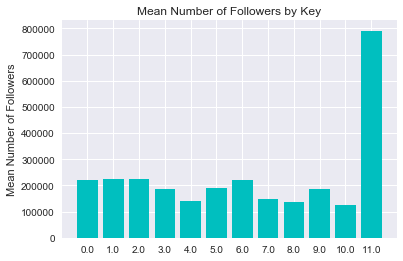

In [25]:
by_key = data_train.groupby('majority_key')
key_means = by_key['followers'].mean()
plt.bar(range(len(key_means)),key_means,tick_label=list(key_means.index), color='c')
plt.ylabel('Mean Number of Followers')
plt.title('Mean Number of Followers by Key')
plt.show()

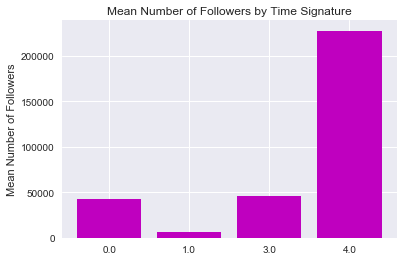

In [26]:
by_time_sig = data_train.groupby('majority_time_signature')
time_sig_means = by_time_sig['followers'].mean()
plt.bar(range(len(time_sig_means)),time_sig_means,tick_label=list(time_sig_means.index), color='m')
plt.ylabel('Mean Number of Followers')
plt.title('Mean Number of Followers by Time Signature')
plt.show()

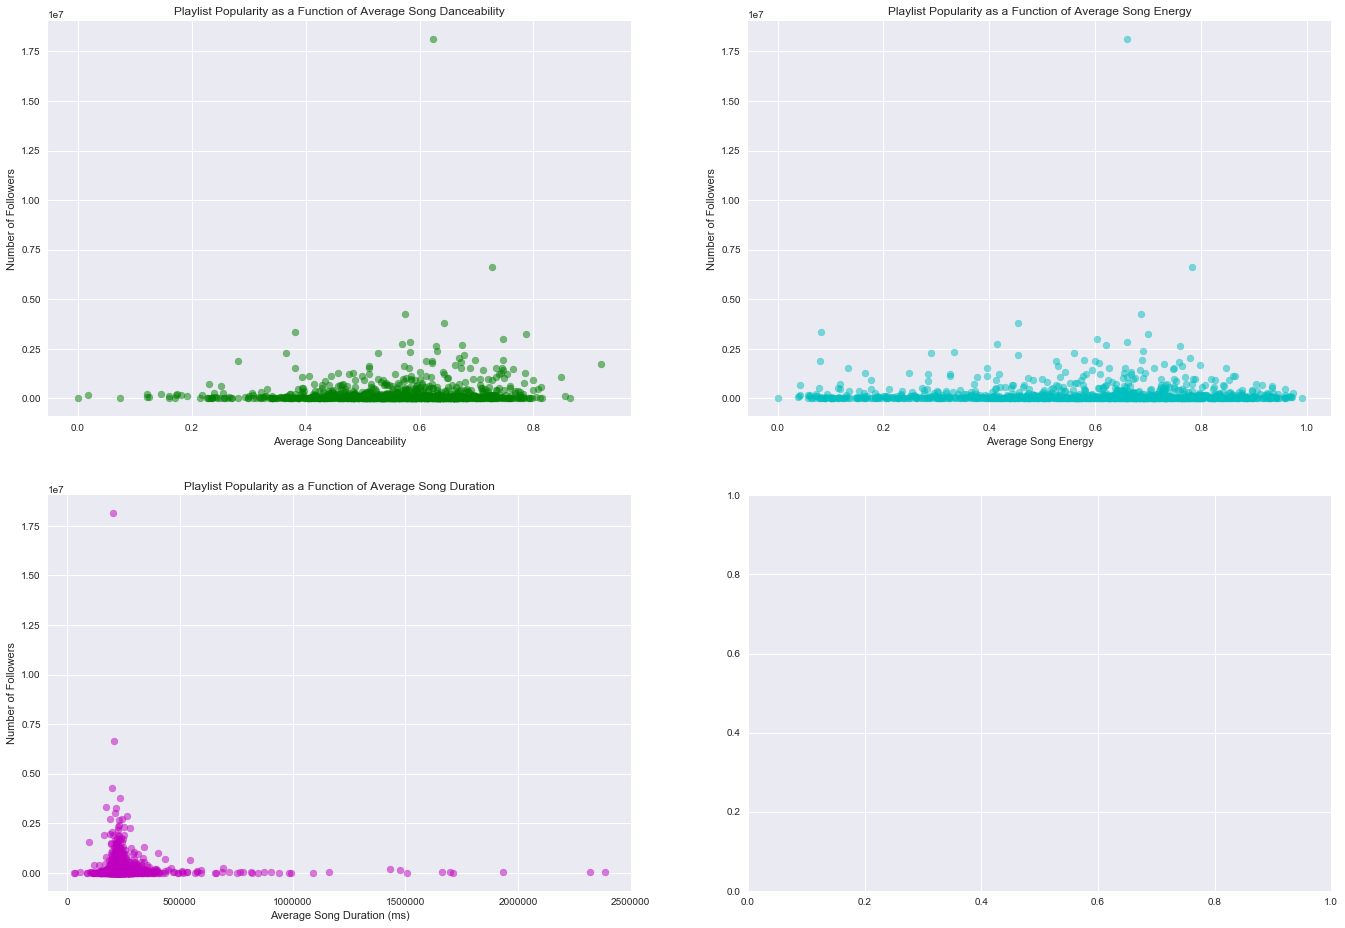

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(23, 16))

plt.subplot(2, 2, 1)
plt.scatter(data_train['avg_danceability'], data_train['followers'], color='g', alpha=0.5)
plt.xlabel('Average Song Danceability')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Danceability')

plt.subplot(2, 2, 2)
plt.scatter(data_train['avg_energy'], data_train['followers'], color='c', alpha=0.5)
plt.xlabel('Average Song Energy')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Energy')

plt.subplot(2, 2, 3)
plt.scatter(data_train['avg_duration_ms'], data_train['followers'], color='m', alpha=0.5)
plt.xlabel('Average Song Duration (ms)')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Duration')

plt.show()

In [28]:
# one-hot encoding for categorical predictors
data_train = pd.get_dummies(data_train, columns=['majority_key','majority_time_signature','majority_album_type'], drop_first=False)
data_test = pd.get_dummies(data_test, columns=['majority_key','majority_time_signature','majority_album_type'], drop_first=False)

# get column names
column_headers = list(data_train.columns.values)

# get variables
X_train = data_train.iloc[:,5:]
y_train = data_train.iloc[:,0]

X_test = data_test.iloc[:,5:]
y_test = data_test.iloc[:,0]

### Linear Regression

In [29]:
X_train2 = sm.add_constant(X_train.values)
model = sm.OLS(y_train.values, X_train2)
results = model.fit()

y_hat_train = results.predict(X_train2)

# test case
X_test2 = sm.add_constant(X_test.values)
y_hat_test = results.predict(X_test2)

r2_score_train = r2_score(y_train, y_hat_train) 
r2_score_test = r2_score(y_test, y_hat_test)

print('R^2 Values for Train, Test Using Linear Regression:', r2_score_train, r2_score_test)

R^2 Values for Train, Test Using Linear Regression: 0.188062242633 0.127995346803


### Polynomial Terms Regression

In [30]:
r2_train_poly = []
r2_test_poly = []

# set up dataframe to add polynomial terms to
cont = ['avg_album_popularity', 'avg_album_release_year', 'avg_artist_popularity', 'avg_artist_followers', 'num_tracks', 'avg_song_popularity', 'avg_danceability', 'avg_energy', 'avg_loudness', 'avg_speechiness', 'avg_acousticness', 'avg_instrumentalness', 'avg_liveness', 'avg_valence', 'avg_duration_ms', 'avg_num_artists', 'avg_num_markets']
X_binary_only = X_train.drop(['avg_album_popularity', 'avg_album_release_year', 'avg_artist_popularity', 'avg_artist_followers', 'num_tracks', 'avg_song_popularity', 'avg_danceability', 'avg_energy', 'avg_loudness', 'avg_speechiness', 'avg_acousticness', 'avg_instrumentalness', 'avg_liveness', 'avg_valence', 'avg_duration_ms', 'avg_num_artists', 'avg_num_markets'], axis=1)
X_test_bin_only = X_test.drop(['avg_album_popularity', 'avg_album_release_year', 'avg_artist_popularity', 'avg_artist_followers', 'num_tracks', 'avg_song_popularity', 'avg_danceability', 'avg_energy', 'avg_loudness', 'avg_speechiness', 'avg_acousticness', 'avg_instrumentalness', 'avg_liveness', 'avg_valence', 'avg_duration_ms', 'avg_num_artists', 'avg_num_markets'], axis=1)
X_poly = X_binary_only.copy()
X_test_poly = X_test_bin_only.copy()

X_poly_test_all = X_test.copy()
X_poly_train_all = X_train.copy()

# function to create and add polynomial terms to dataframe
def add_poly_features(train, test, poly_train, poly_test, polylist):
    for col in polylist:
        for i in range(2,4):
            poly_train[col + '_' + str(i)] = train[col]**i
            poly_test[col + '_' + str(i)] = test[col]**i

add_poly_features(X_train, X_test, X_poly_train_all, X_poly_test_all,cont)

# regress and calculate R^2
poly_regression_model = linear_model.LinearRegression(fit_intercept=False)
poly_regression_model.fit(X_poly_train_all, y_train)

y_hat_train = poly_regression_model.predict(X_poly_train_all)
y_hat_test = poly_regression_model.predict(X_poly_test_all)

r2_train_poly.append( r2_score(y_train, y_hat_train))
r2_test_poly.append( r2_score(y_test, y_hat_test))

print('R^2 Values for Train, Test Using Polynomial Regression:', r2_train_poly, r2_test_poly)

R^2 Values for Train, Test Using Polynomial Regression: [0.22365592656318156] [0.19078809329451474]


### kNN Regression

In [31]:
# test different k's
K = [1, 2, 4,8, 10, 50, 100, 250, 500, 600, 700, 800, 900, 1000]

r2_test_knn = []
r2_train_knn = []

# test different k's and regress
for i,k in enumerate(K): 
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    predicted_pickups_train = knn_model.predict(X_train)
    predicted_pickups = knn_model.predict(X_test)

    r2_train_knn.append( r2_score(y_train, predicted_pickups_train))
    r2_test_knn.append( r2_score(y_test, predicted_pickups))
    
print('R^2 Values for Train Using KNN Regression:', r2_train_knn)
print()
print('R^2 Values for Test Using KNN Regression:', r2_test_knn)

R^2 Values for Train Using KNN Regression: [0.99999999826605368, 0.70705295578349214, 0.26384447277586165, 0.14062785261746957, 0.16815399746437676, 0.041790871252071704, 0.026784122297934254, 0.022334620712726183, 0.013199508562418361, 0.011615787116215581, 0.0092690893153853926, 0.0079270698554815278, 0.0074171109814979985, 0.0056618388771036976]

R^2 Values for Test Using KNN Regression: [-0.87195646189656983, -0.32627859453665375, -0.1542926908927027, -0.089021508792754611, -0.11809935938908334, -0.020776306046869086, -0.010578038605963069, 0.0031685923025387419, 0.0036867169843481928, 0.0026448150105176094, 0.0015801451321187931, 0.0015217888123526535, 0.00056359830487651141, -0.0006410793680169391]


### Random Forest Regression

In [32]:
r2_train_rf = []
r2_test_rf = []

# check multiple depths to see which depth is best
for i in range(1, 20):
    rf_reg = RandomForestRegressor(max_depth=i)
    rf_reg.fit(X_train, y_train)

    rf_yhat_train = rf_reg.predict(X_train)
    rf_yhat_test = rf_reg.predict(X_test)

    r2_train_rf.append( r2_score(y_train, rf_yhat_train))
    r2_test_rf.append( r2_score(y_test, rf_yhat_test))

print('R^2 Values for Train Using Random Forest Regression:', r2_train_rf)
print()
print('R^2 Values for Test Using Random Forest Regression:', r2_test_rf)

R^2 Values for Train Using Random Forest Regression: [0.49720296756434346, 0.61053350899380598, 0.68024242103697308, 0.67417419454609795, 0.72703450561074345, 0.76129438982654363, 0.82826168965869496, 0.89075878029084954, 0.82731366848664911, 0.90645817073650103, 0.82926781510319325, 0.79301657823217642, 0.78252458746760933, 0.79662562095222622, 0.84607245407198439, 0.86602676866652106, 0.92853095764601801, 0.83285277634645305, 0.9345492041547051]

R^2 Values for Test Using Random Forest Regression: [0.065688530132135381, 0.11955126119857296, 0.23689289946392322, 0.26770594423792349, 0.26822437144144051, 0.30804616302553378, 0.29194690047452032, 0.30943028691050356, 0.36153466389056399, 0.30359581277335412, 0.22811542159418852, 0.24413334080333959, 0.17365091726726267, 0.2942474156517787, 0.23550012470930493, 0.25922089750101251, 0.24252559131939444, 0.26024406499389796, 0.25732779460683675]


In [33]:
# get best depth
index, value = max(enumerate(r2_test_rf), key=operator.itemgetter(1))
best_depth2 = index + 1

print('Best Depth for Random Forest Tree Depth:', best_depth2 )

Best Depth for Random Forest Tree Depth: 9


## Fine Tuning Phase

### Ridge and Lasso on Polynomial Term Regression

In [34]:
# Ridge Regression on Polynomial Term Regression
lambdas = [.001,.005,1,5,10,50,100,500,1000]    
ridge = RidgeCV(alphas=lambdas, fit_intercept=False, normalize=True, cv=10)
ridge.fit(X_poly_train_all, y_train)

print("Ridge train R^2: ", ridge.score(X_poly_train_all, y_train))
print('Ridge test R^2', ridge.score(X_poly_test_all, y_test))

Ridge train R^2:  0.326717798114
Ridge test R^2 0.256967193697


In [35]:
# Lasso Regression on Polynomial Term Regression
lasso = LassoCV(alphas=lambdas, fit_intercept=False, normalize=True, cv=10)
lasso.fit(X_poly_train_all, y_train)

print("Lasso train R^2: ", lasso.score(X_poly_train_all, y_train))
print('Lasso test R^2', lasso.score(X_poly_test_all, y_test))

/Users/emilychen1/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso train R^2:  0.330738827492
Lasso test R^2 0.222855946887


/Users/emilychen1/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [36]:
# Fine Tuning Random Forest: get R^2 values for optimal depth that we calculated in shotgun approach
r2_train_rf = []
r2_test_rf = []

rf_reg = RandomForestRegressor(max_depth=best_depth2)
rf_reg.fit(X_train, y_train)

rf_yhat_train = rf_reg.predict(X_train)
rf_yhat_test = rf_reg.predict(X_test)

r2_train_rf.append( r2_score(y_train, rf_yhat_train))
r2_test_rf.append(r2_score(y_test, rf_yhat_test))

print('R^2 Values for Train, Test Using Random Forest Regression:', r2_train_rf, r2_test_rf)

R^2 Values for Train, Test Using Random Forest Regression: [0.90262541883850489] [0.24087108131907387]


In [37]:
# step 1: fine tuning number of trees
r2_train_rf_trees = []
r2_test_rf_trees = []

# will try various number of trees
trees = [2**x for x in range(8)]  # 2, 4, 8, 16, 32, ... 

# try different trees with optimal depth
for n_trees in trees:
    rf = RandomForestRegressor(n_estimators=n_trees, max_depth=best_depth2, max_features='auto')
    rf.fit(X_train, y_train)

    rf_yhat_train = rf.predict(X_train)
    rf_yhat_test = rf.predict(X_test)

    r2_train_rf_trees.append(r2_score(y_train, rf_yhat_train))
    r2_test_rf_trees.append(r2_score(y_test, rf_yhat_test))
    
print('R^2 Values for Train Using Random Forest Regression:', r2_train_rf_trees)
print()
print('R^2 Values for Test Using Random Forest Regression:', r2_test_rf_trees)

R^2 Values for Train Using Random Forest Regression: [0.57492208179960747, 0.79613269275111742, 0.74639675519356485, 0.70857324665172727, 0.90271868614388662, 0.85278439937628614, 0.88376628817650682, 0.85892059438543478]

R^2 Values for Test Using Random Forest Regression: [-0.019096793332201933, 0.063317838578937025, 0.1650974481859171, 0.28993793816624602, 0.25554733422998355, 0.30215898703465505, 0.26622004029166813, 0.2695700261496573]


In [38]:
# get best number of trees
index, value = max(enumerate(r2_test_rf_trees), key=operator.itemgetter(1))
best_trees2 = trees[index]

print('Random Forest Best Number of Trees:',best_trees2)
print('R^2 Value:',value)

Random Forest Best Number of Trees: 32
R^2 Value: 0.302158987035


In [39]:
# step 2: fine tuning number of predictors used
r2_train_rf_feat = []
r2_test_rf_feat = []

# 38 = len(list(X_train)) is the maximum number of predictors we have
for i in range(1, len(list(X_train))):
    rf = RandomForestRegressor(n_estimators=best_trees2, max_depth=best_depth2, max_features=i)
    rf.fit(X_train, y_train)

    rf_yhat_train = rf.predict(X_train)
    rf_yhat_test = rf.predict(X_test)

    r2_train_rf_feat.append(r2_score(y_train, rf_yhat_train))
    r2_test_rf_feat.append(r2_score(y_test, rf_yhat_test))
    
print('R^2 Values for Train Using Random Forest Regression:', r2_train_rf_feat)
print()
print('R^2 Values for Test Using Random Forest Regression:', r2_test_rf_feat)

R^2 Values for Train Using Random Forest Regression: [0.75633988113401796, 0.70946280665336514, 0.74961922274263015, 0.79715576473639183, 0.85743741826413333, 0.83103940853478919, 0.88522452216497172, 0.85777386983596993, 0.88534598066540782, 0.84321293307864076, 0.88287446763216326, 0.87535793526961547, 0.81132008668654254, 0.84070341093556755, 0.90326674743422597, 0.87555445691910205, 0.85607681263792534, 0.84174249333054441, 0.86104110520470523, 0.84989793225520183, 0.86331742273837153, 0.86374805813696498, 0.91830319188432075, 0.87902292764811663, 0.81898358578364983, 0.81512189037245752, 0.88782640132252211, 0.85056039360514102, 0.85254321536783029, 0.85774173971159018, 0.78129295743555305, 0.8484575148908714, 0.8238652173578408, 0.89008544896313146, 0.90070565416255888, 0.87816773093967326, 0.8643900597449834]

R^2 Values for Test Using Random Forest Regression: [0.13685407984731046, 0.13056892014350696, 0.20169352611776525, 0.17519220035219507, 0.17637356446846342, 0.19977953355

In [40]:
# get best number of predictors and best R^2 value
index, value = max(enumerate(r2_test_rf_feat), key=operator.itemgetter(1))

print('RandomForest Number of Predictors for Best Value:',index+1)
print('Final Best R^2 Value:',value)

RandomForest Number of Predictors for Best Value: 26
Final Best R^2 Value: 0.299518312815
